In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = keras.datasets.fashion_mnist

In [36]:
# load in the data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# to shrink the data
train_images = train_images/255.0
test_images = test_images/255.0

In [34]:
# define layors for our model (Sequential means a sequence of layer. first in input, then hidden, then output)
# input
# hidden (activation function is rectify linear unit. could be something else)(dense means the layor is fully connected to the other nodes)
# output (softmax gives us the probability of what the model thinks each output node is. Adds up to one.)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

# set parameter for our model (can change these, google them)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# epochs is how many times the model is going to see this information. The information is given in a random order/ different order
model.fit(train_images, train_labels, epochs=10)

# to see how it goes
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested ACC: ", test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 779us/step - loss: 0.5023 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.3777 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.3405 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.3144 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.2982 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.2813 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.2729 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.2603 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.2520 - accuracy: 0.9064
Epoch 10/10
313/313 [==============================] - 1s 882us/

313/313 [==============================] - 0s 692us/step


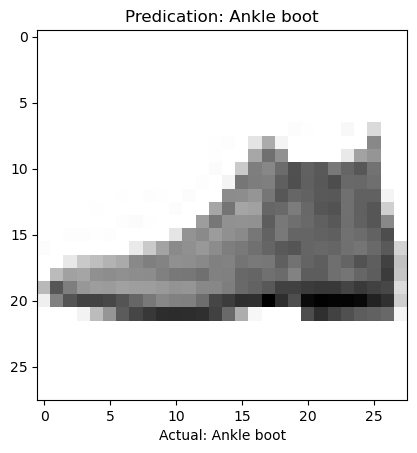

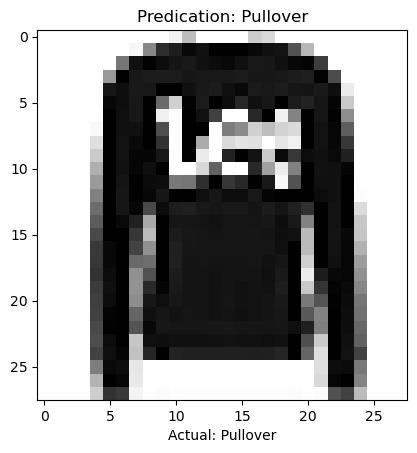

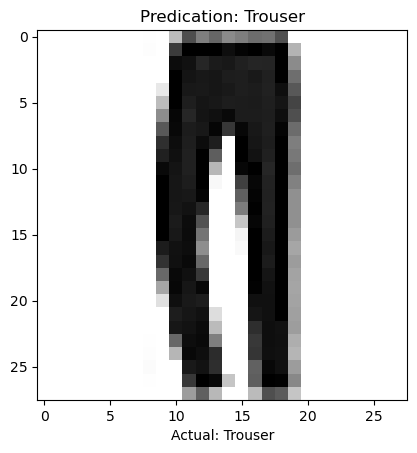

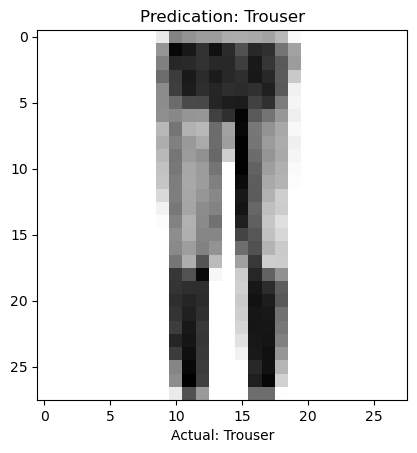

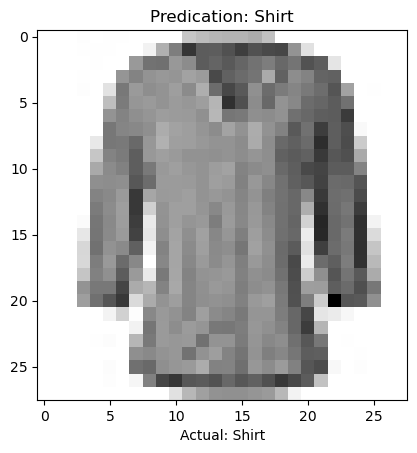

In [33]:
# making a prediction using the model
prediction = model.predict([test_images]) # this simply gives the numerical probability of each article of clothing as a list

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
   
    plt.xlabel("Actual: " + class_names[test_labels[i]]) # puts actual label as x axis
    # we want to get the number that is the biggest, and associate it with the respective class name eg. sandals, shirt, etc
    plt.title("Predication: " + class_names[np.argmax(prediction[i])]) # puts predicted label as title
    plt.show()
                                           